In [ ]:
#Devesh kumar
#world happiness report project

In [1]:
#importing libraries
import numpy as np
import pandas as pd

#for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#for model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#load datset
hp=pd.read_csv('happiness_score_dataset.csv')
hp

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
# to show full rows
#pd.set_option('display.max_rows', None)

In [4]:
hp.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
hp.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
hp.shape

(158, 12)

In [8]:
#Checking null values 
hp.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

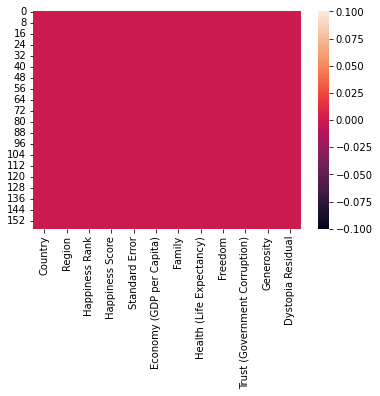

In [9]:
#heatmap of null values
sns.heatmap(hp.isnull())

In [10]:
#not any null value

# EDA

In [11]:
#to convert categorical data in int
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
#converting countries
hp['Country']=le.fit_transform(hp['Country'])

In [14]:
#converting Region
hp['Region']=le.fit_transform(hp['Region'])

In [15]:
hp

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [16]:
hp.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [17]:
hp.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Checking outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x21ba2384580>,
 'caps': [<matplotlib.lines.Line2D at 0x21ba2384be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ba2384130>],
 'medians': [<matplotlib.lines.Line2D at 0x21ba2391340>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ba23916d0>],
 'means': []}

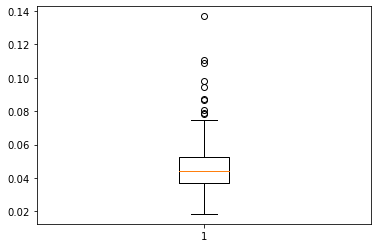

In [18]:
plt.boxplot(hp['Standard Error'])
#outliers present upper limit

{'whiskers': [<matplotlib.lines.Line2D at 0x21ba23f5370>,
 'caps': [<matplotlib.lines.Line2D at 0x21ba23f5a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ba23e5fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x21ba24001f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ba2400580>],
 'means': []}

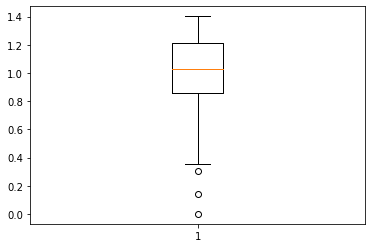

In [19]:
plt.boxplot(hp['Family'])
#outliers present in lower limit

{'whiskers': [<matplotlib.lines.Line2D at 0x21ba245ae80>,
 'caps': [<matplotlib.lines.Line2D at 0x21ba246a4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ba245aaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x21ba246abe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ba246af70>],
 'means': []}

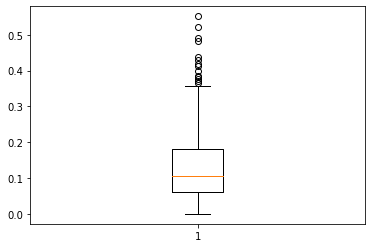

In [20]:
plt.boxplot(hp['Trust (Government Corruption)'])
#outliers present in upper limit

{'whiskers': [<matplotlib.lines.Line2D at 0x21ba24c69a0>,
 'caps': [<matplotlib.lines.Line2D at 0x21ba24d5100>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ba24c6610>],
 'medians': [<matplotlib.lines.Line2D at 0x21ba24d5820>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ba24d5bb0>],
 'means': []}

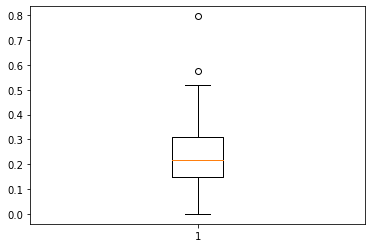

In [21]:
plt.boxplot(hp['Generosity'])
# two outliers present in upper limit

{'whiskers': [<matplotlib.lines.Line2D at 0x21ba253a820>,
 'caps': [<matplotlib.lines.Line2D at 0x21ba253af40>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ba253a490>],
 'medians': [<matplotlib.lines.Line2D at 0x21ba25446a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ba2544a30>],
 'means': []}

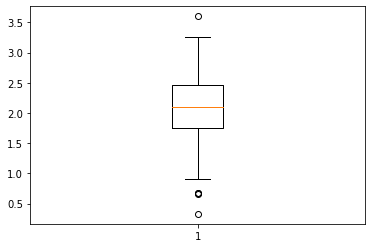

In [22]:
plt.boxplot(hp['Dystopia Residual'])

Country                             AxesSubplot(0.125,0.536818;0.110714x0.343182)
Region                           AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Happiness Rank                   AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Happiness Score                  AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Family                                 AxesSubplot(0.125,0.125;0.110714x0.343182)
Health (Life Expectancy)            AxesSubplot(0.257857,0.125;0.110714x0.343182)
Freedom                             AxesSubplot(0.390714,0.125;0.110714x0.343182)
Trust (Government Corruption)       AxesSubplot(0.523571,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.656429,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

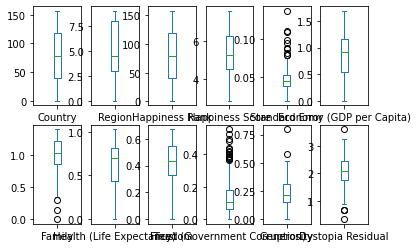

In [23]:
#plotting boxplots together
hp.plot(kind='box',subplots=True,layout=(2,6))

In [24]:
hp.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Rank'>

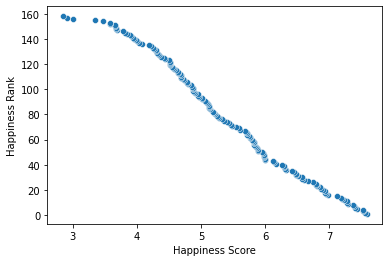

In [25]:
sns.scatterplot(x='Happiness Score',y='Happiness Rank',data=hp)
#happiness score decrease with increase in rank

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Rank'>

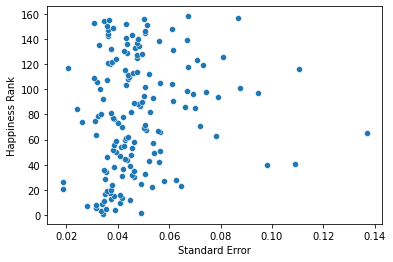

In [26]:
sns.scatterplot(x='Standard Error',y='Happiness Rank',data=hp)
#some incease in happiness score with increase standerd error

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Rank'>

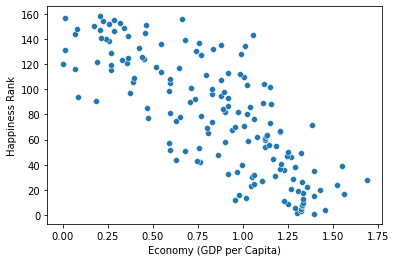

In [27]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Rank',data=hp)
# happiness score decrease with increase in Economy (GDP per Capita)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

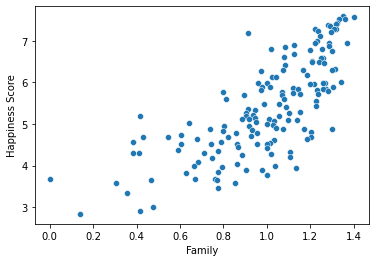

In [28]:
sns.scatterplot(x='Family',y='Happiness Score',data=hp)
#happiness score increase with increase in Family

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

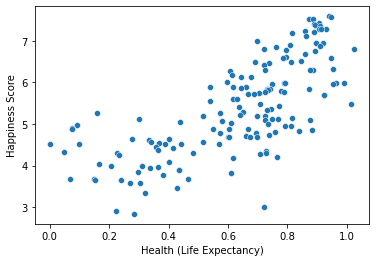

In [29]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=hp)
#happiness score increase with increase in Health

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

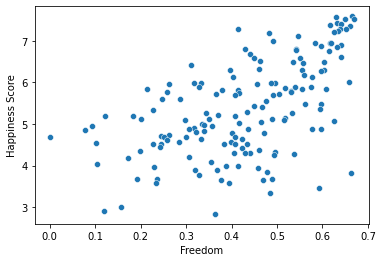

In [30]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=hp)
#happiness score increase with increase in Freedom

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

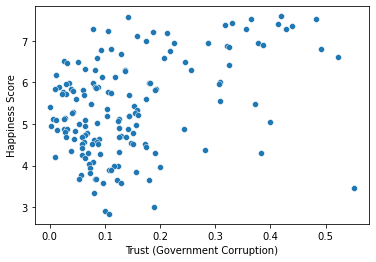

In [31]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=hp)
#some happiness score increase with increase in Trust

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

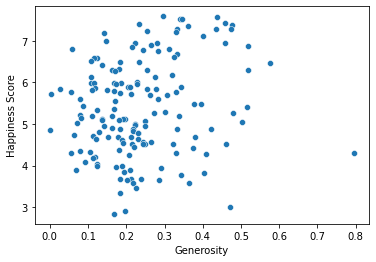

In [32]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=hp)
#some increase in happiness score gradually

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

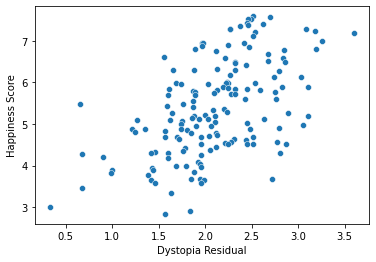

In [33]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=hp)
#some increase in happiness score gradually

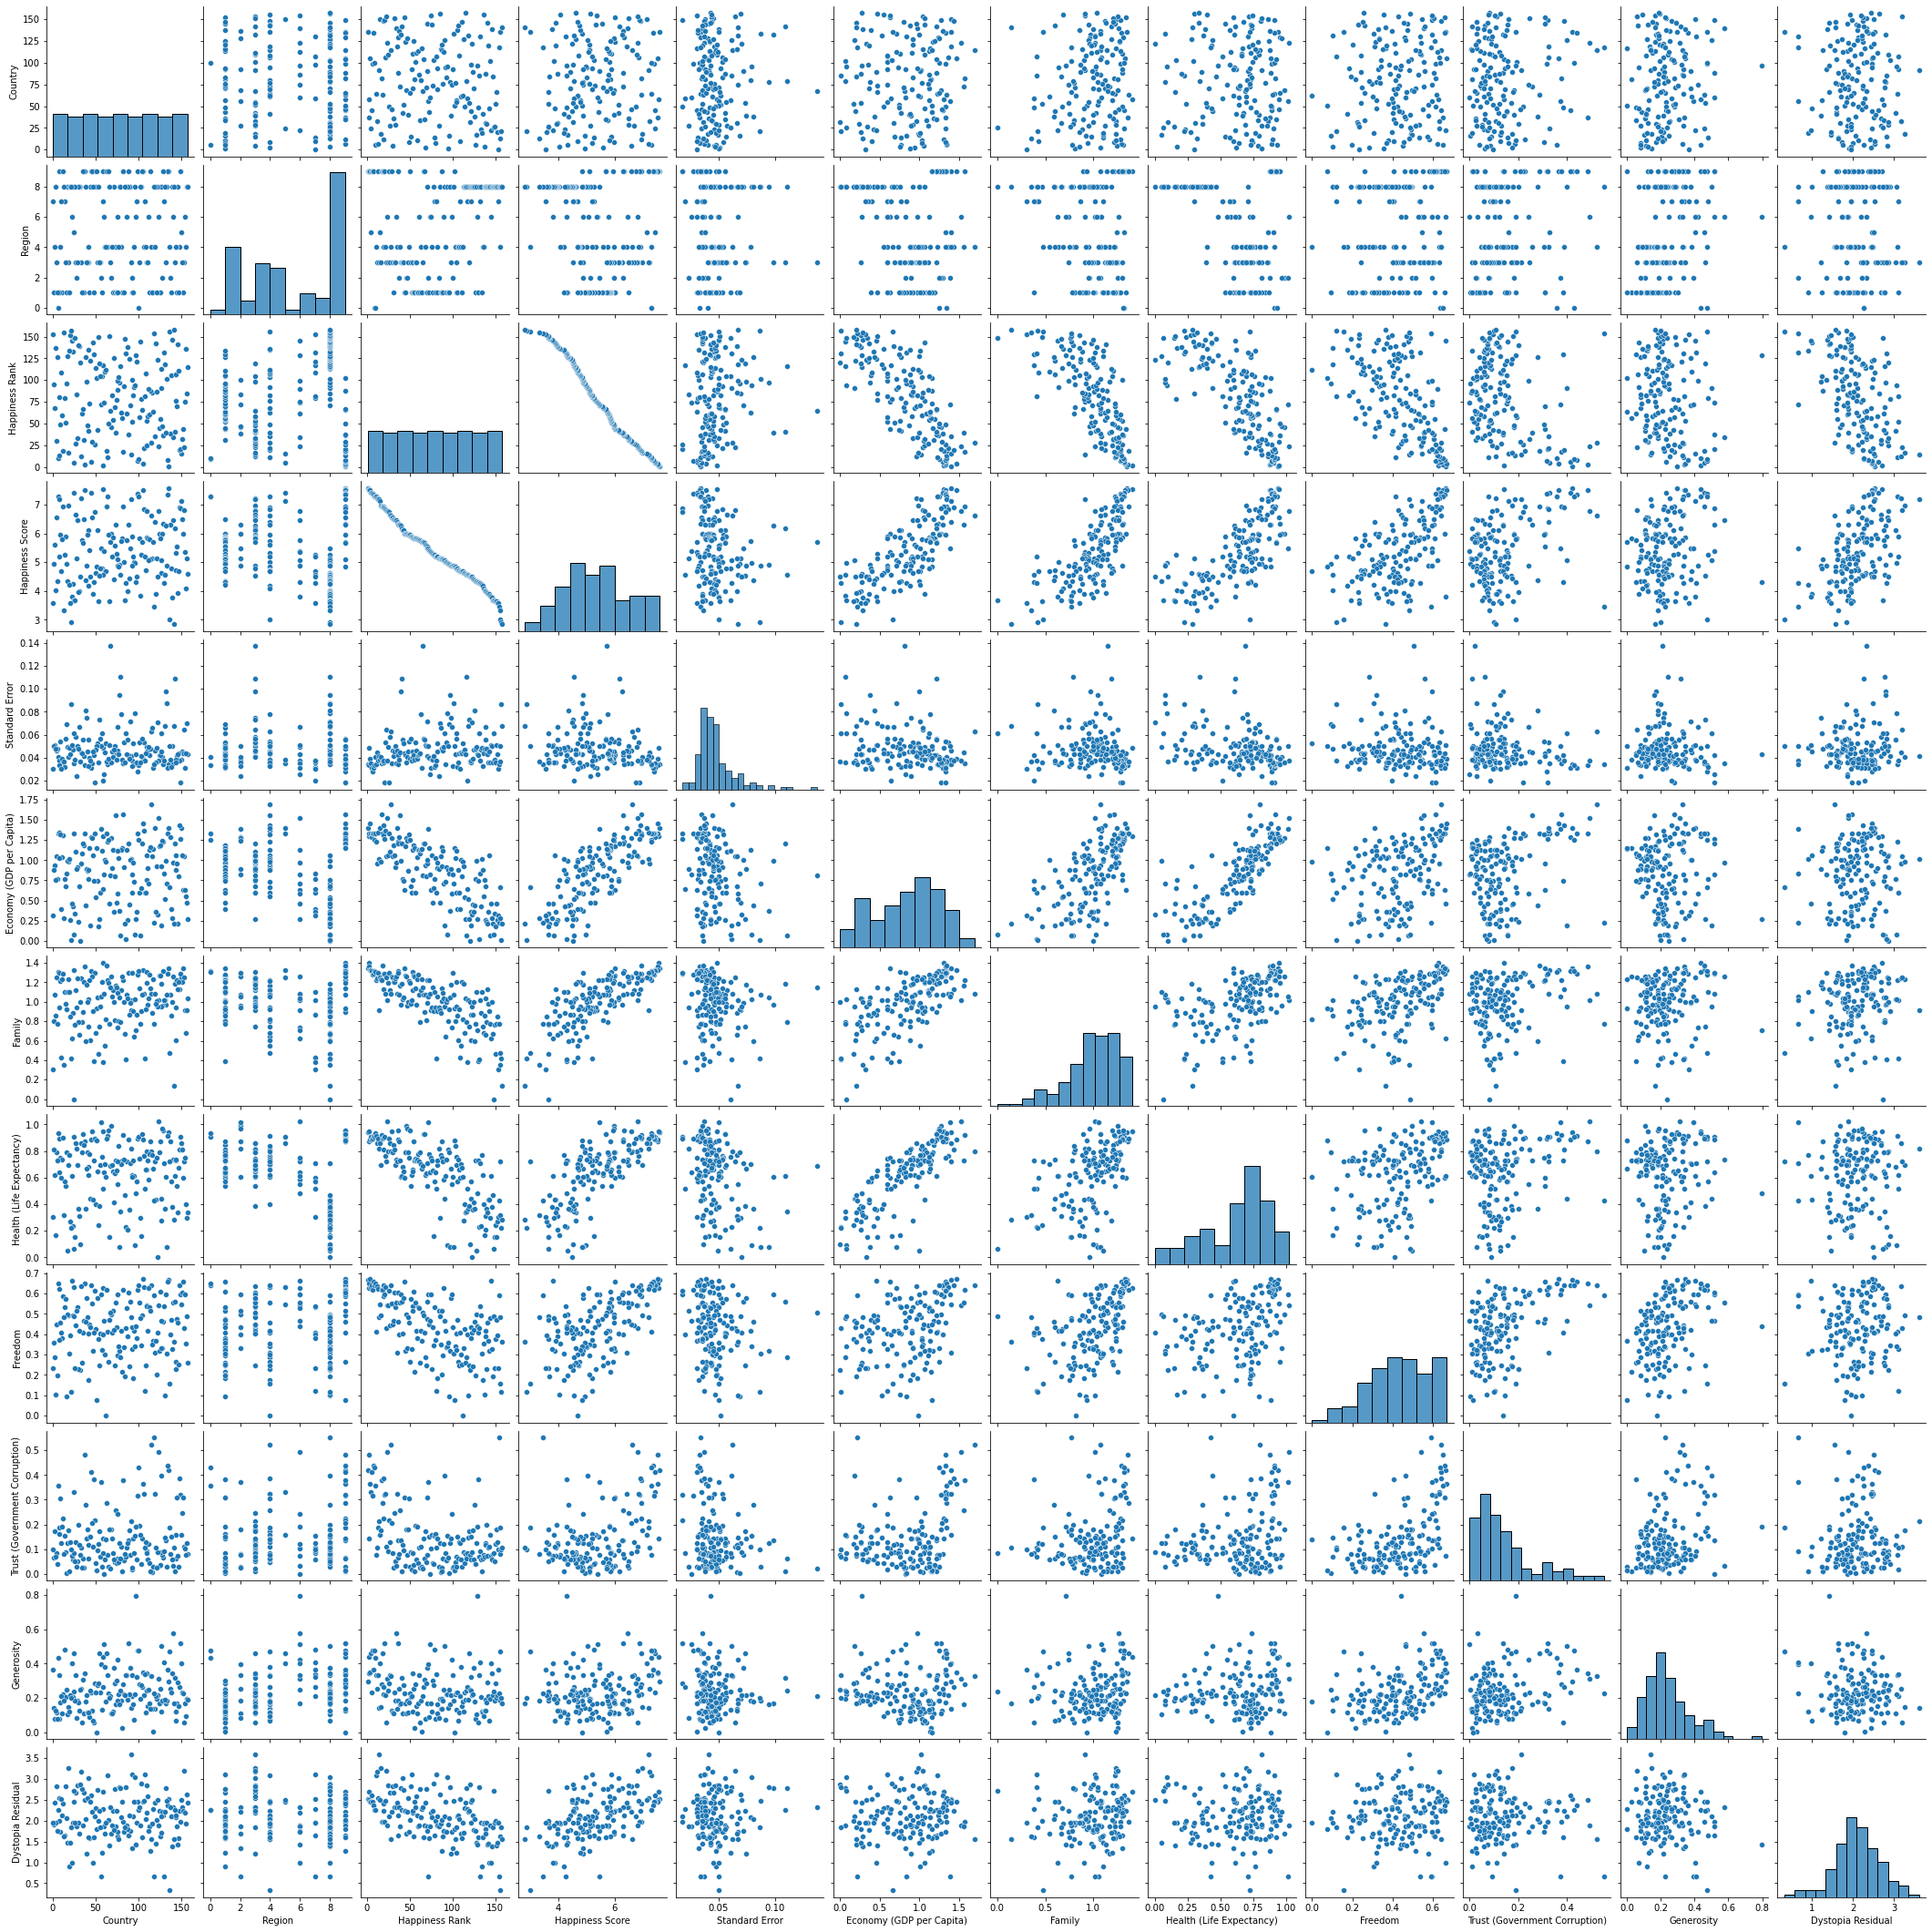

In [34]:
sns.pairplot(hp)
#some columns are giving positive result and some are negative result with one another

In [35]:
#correelation between columns
hp.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

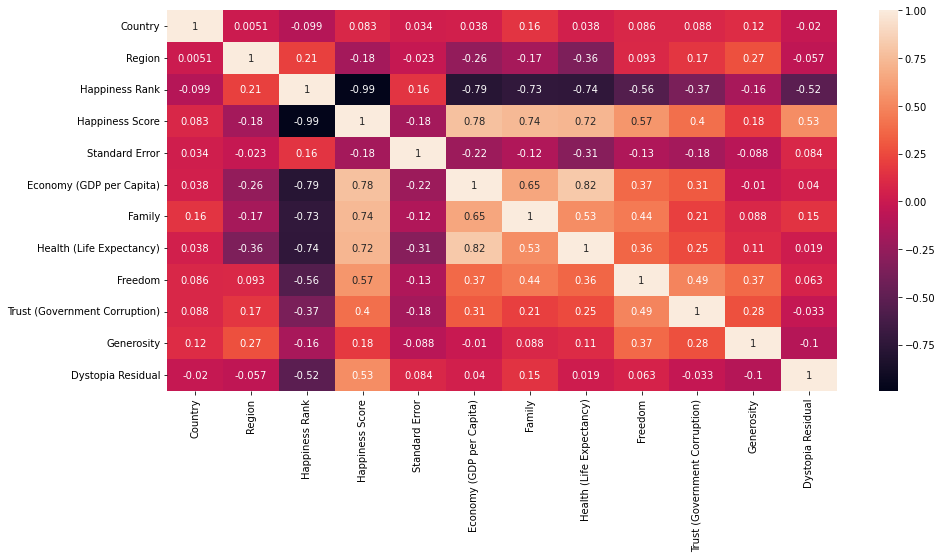

In [36]:
#corelation heatmap
plt.figure(figsize=(15,7))
sns.heatmap(hp.corr(),annot=True)

In [37]:
#as happiness score is target variable then other are correlated with happiness score as follow:
#Economy (GDP per Capita)=78%
#Family=74%
#Health (Life Expectancy)Freedom Trust (Government Corruption)=72%
#Freedom=57%

# Removing Outliers

In [38]:
#removing outlier by zscore
from scipy.stats import zscore

In [39]:
z=np.abs(zscore(hp))
z

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,1.721000,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.449465,1.300256,1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.909893,1.300256,1.677149,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,1.655224,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.194920,0.040302,1.633299,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.436096,0.965117,1.655501,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,1.260695,0.375441,1.677427,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.260695,0.965117,1.699352,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [40]:
z=np.array(z)
z

array([[1.23877001, 1.30025593, 1.72099989, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.69907456, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.67714922, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 1.67742676, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 1.69935209, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 1.72127743, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [41]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [42]:
z[27][6]

0.3224758135395213

### Checking skewness

In [43]:
hp.skew()
# positive skewness is present in standerd error,Trust (Government Corruption) ,Generosity

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:ylabel='Frequency'>

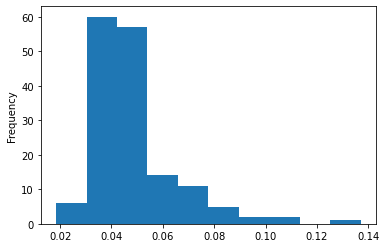

In [44]:
hp['Standard Error'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

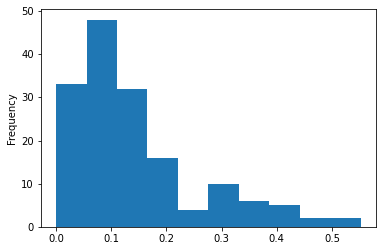

In [45]:
hp['Trust (Government Corruption)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

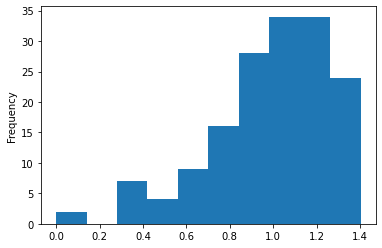

In [46]:
hp['Family'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

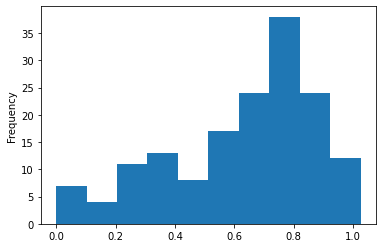

In [47]:
hp['Health (Life Expectancy)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

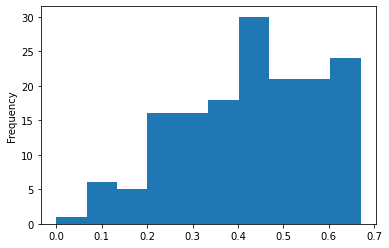

In [48]:
hp['Freedom'].plot.hist()

### treating skewness

In [49]:
#reducing skewness using boxcox 
from scipy.stats import boxcox
hp['Standard Error']=boxcox(hp['Standard Error'],0)
hp['Standard Error']

0     -3.378165
1     -3.019206
2     -3.402799
3     -3.249335
4     -3.337378
         ...   
153   -3.362746
154   -3.308801
155   -2.992737
156   -2.446686
157   -2.699041
Name: Standard Error, Length: 158, dtype: float64

In [50]:
#reducing skewness using yeojohnson
from scipy.stats import yeojohnson
hp['Trust (Government Corruption)']= yeojohnson(hp['Trust (Government Corruption)'],0)
hp['Trust (Government Corruption)']

0      0.350502
1      0.132299
2      0.394451
3      0.311176
4      0.284856
         ...   
153    0.439486
154    0.077054
155    0.173163
156    0.095874
157    0.101934
Name: Trust (Government Corruption), Length: 158, dtype: float64

In [51]:
hp.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.180922
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [52]:
hp.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.350502,0.29678,2.51738
1,58,9,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.132299,0.43630,2.70201
2,37,9,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.394451,0.34139,2.49204
3,105,9,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.311176,0.34699,2.46531
4,24,5,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.284856,0.45811,2.45176


In [53]:
hp.shape

(158, 12)

In [54]:
#removing outliers
hp_new=hp[(z<3).all(axis=1)]

In [55]:
hp_new.shape

(149, 12)

In [56]:
hp=hp_new
hp

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.350502,0.29678,2.51738
1,58,9,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.132299,0.43630,2.70201
2,37,9,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.394451,0.34139,2.49204
3,105,9,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.311176,0.34699,2.46531
4,24,5,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.284856,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,-2.967923,0.46534,0.77115,0.15185,0.46866,0.164853,0.20165,1.41723
151,20,8,152,3.587,-3.140989,0.25812,0.85188,0.27125,0.39493,0.120730,0.21747,1.46494
152,0,7,153,3.575,-3.478943,0.31982,0.30285,0.30335,0.23414,0.092752,0.36510,1.95210
154,13,8,155,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.077054,0.18260,1.63328


In [57]:
hp.shape

(149, 12)

In [58]:
#input data
x=hp.iloc[:,4:-1]

In [59]:
#output data
y=hp.iloc[:,3]

In [60]:
x.shape

(149, 7)

In [61]:
y.shape

(149,)

In [62]:
#sending data to training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=46)
# here 67% data sent for training and 33% data sent for testing

In [63]:
x_train.shape

(99, 7)

In [64]:
x_test.shape

(50, 7)

In [65]:
y_train.shape

(99,)

In [66]:
y_test.shape

(50,)

In [67]:
lr=LinearRegression()

In [68]:
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
lr.coef_

array([0.1768278 , 0.72032328, 1.28456207, 1.27137194, 1.28754347,
       1.88040356, 0.42399422])

In [70]:
lr.intercept_

2.3290629126497624

In [71]:
#model score/accuracy
lr.score(x_train,y_train)

0.8225734871950694

In [72]:
pred=lr.predict(x_test)
print('Predicted Value',pred)
print('Actual Value',y_test)

Predicted Value [7.08950233 5.81519794 4.74754435 7.17640891 6.08281996 3.96915313
 5.79168198 5.9545693  5.27706267 4.23649835 5.49216254 4.65516515
 6.52696461 4.57122249 6.26447482 6.52999065 4.81070889 6.16741036
 3.84822342 4.14948348 5.32280885 4.79950336 5.23872213 5.77541207
 5.09694449 6.59228254 5.58332483 4.38001668 4.3220039  5.30616204
 4.41419274 4.88242422 6.80219697 4.36455115 4.55929426 5.75611991
 6.30884685 4.82736126 4.63111265 5.93678947 5.70135403 5.76678574
 4.95924126 4.17966153 5.2215004  6.08646002 6.23263962 5.31951875
 6.33174353 6.58546377]
Actual Value 4      7.427
56     5.828
109    4.686
8      7.286
24     6.786
136    4.033
44     5.995
97     4.885
98     4.876
77     5.268
81     5.192
140    3.931
45     5.987
106    4.739
11     7.226
38     6.295
51     5.889
10     7.278
80     5.194
121    4.512
41     6.130
105    4.786
50     5.890
70     5.477
104    4.788
28     6.575
78     5.253
138    3.989
150    3.655
73     5.399
100    4.867
129    4

In [73]:
#Errors

from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Error:')
print("Mean Absolute Error:", mean_absolute_error(y_test,pred))
print("Mean Squared Error:", mean_squared_error(y_test,pred))
print("Root mean Square Error:", np.sqrt(mean_squared_error(y_test,pred)))

Error:
Mean Absolute Error: 0.44949763651877317
Mean Squared Error: 0.3368374008928584
Root mean Square Error: 0.5803769472445114


# Hence the model is working with approx. 82.25% accuracy